# GRAPHICAL VISUALIZATION OF DECISION TREE CLASSIFIER

**Import necessary packages and modules**

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Load the iris data

In [2]:
iris = datasets.load_iris()
features = iris.feature_names
data = pd.DataFrame(iris.data, columns=features)
output = "labels"
data[output] = iris.target
data = data.sample(frac=1, random_state=1).reset_index(drop=True)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.8,4.0,1.2,0.2,0
1,5.1,2.5,3.0,1.1,1
2,6.6,3.0,4.4,1.4,1
3,5.4,3.9,1.3,0.4,0
4,7.9,3.8,6.4,2.0,2
5,6.3,3.3,4.7,1.6,1
6,6.9,3.1,5.1,2.3,2
7,5.1,3.8,1.9,0.4,0
8,4.7,3.2,1.6,0.2,0
9,6.9,3.2,5.7,2.3,2


## 2. Hyper-parameter optimization using GridSearch

**Create parameter grid using lists of max_depth, min_samples_split, and min_impurity_decrease**

In [3]:
list_of_max_depth = np.linspace(3,20,17, dtype=int).tolist()
list_of_min_samples_split = np.linspace(3, 20, 17, dtype=int).tolist()
list_of_min_impurity_decrease = np.logspace(-3, -1, 10).tolist()
print("list of max_depth:",list_of_max_depth)
print("list of min_samples_split:",list_of_min_samples_split)
print("list of min_impurity_decrease:",list_of_min_impurity_decrease)
param_grid = [{"max_depth":list_of_max_depth,
               "min_samples_split":list_of_min_samples_split,
               "min_impurity_decrease":list_of_min_impurity_decrease}]

list of max_depth: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]
list of min_samples_split: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]
list of min_impurity_decrease: [0.001, 0.0016681005372000592, 0.0027825594022071257, 0.004641588833612777, 0.007742636826811269, 0.01291549665014884, 0.021544346900318832, 0.03593813663804626, 0.05994842503189409, 0.1]


**Train multiple classifiers through gridsearch to optimize parameters**

In [4]:
grid_search_classifier = GridSearchCV(DecisionTreeClassifier(criterion="gini", splitter='best'),
                                      param_grid=param_grid, scoring = 'accuracy',
                                      cv = 5, refit=True, n_jobs =-1)
grid_search_classifier.fit(data[features], data[output])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                        15, 16, 17, 18, 20],
                          'min_impurity_decrease': [0.001,
                                                    0.0016681005372000592,
                                                    0.0027825594022071257,
                                                    0.004641588833612777,
                                                    0.007742636826811269,
                                                    0.01291549665014884,
                                                    0.021544346900318832,
                                                    0.03593813663804626,
                                                    0.05994842503189409, 0.1],
                          'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                                13, 14,

## 3. Graphical visualization of the best decision tree classifier

**best parameter set**

In [5]:
grid_search_classifier.best_params_

{'max_depth': 9,
 'min_impurity_decrease': 0.0027825594022071257,
 'min_samples_split': 3}

**best score**

In [6]:
grid_search_classifier.best_score_

0.96

**Graphical visualization using graphviz**

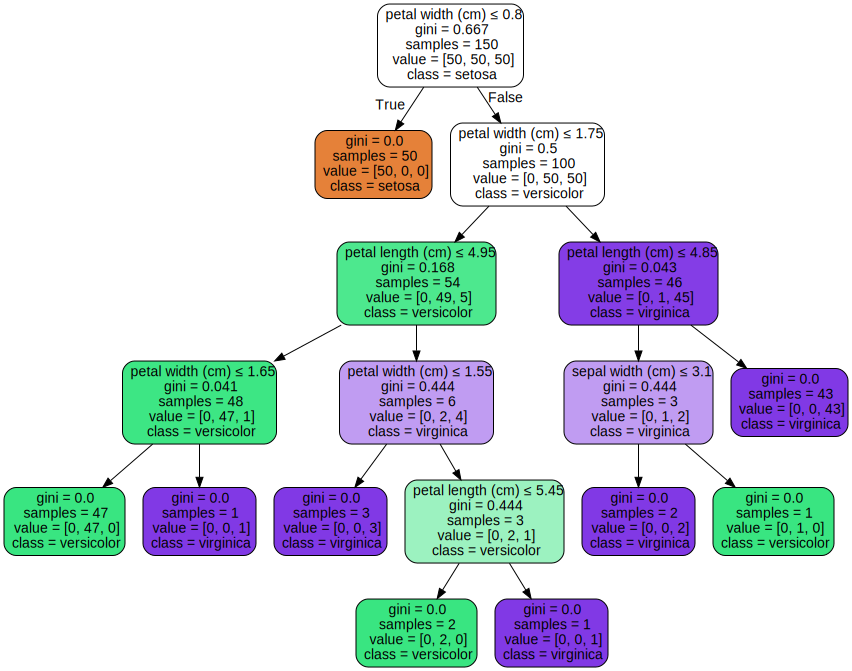

In [7]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(grid_search_classifier.best_estimator_, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)  
graph